# The `Online Retail` dataset is about two years of real online retail transactions in the UK. It includes information about products, quantities, prices, customer IDs, and countries. The company sells unique gifts, and many customers are wholesalers. The data can help understand customer behavior and predict profitability over time. It has been used in research studies for customer segmentation and prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [2]:
df=pd.read_csv("online-retail-dataset.csv")
retail_df = df.copy()
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# shape of dataset
retail_df.shape

(541909, 8)

> ## Data Wrangling:

In [4]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

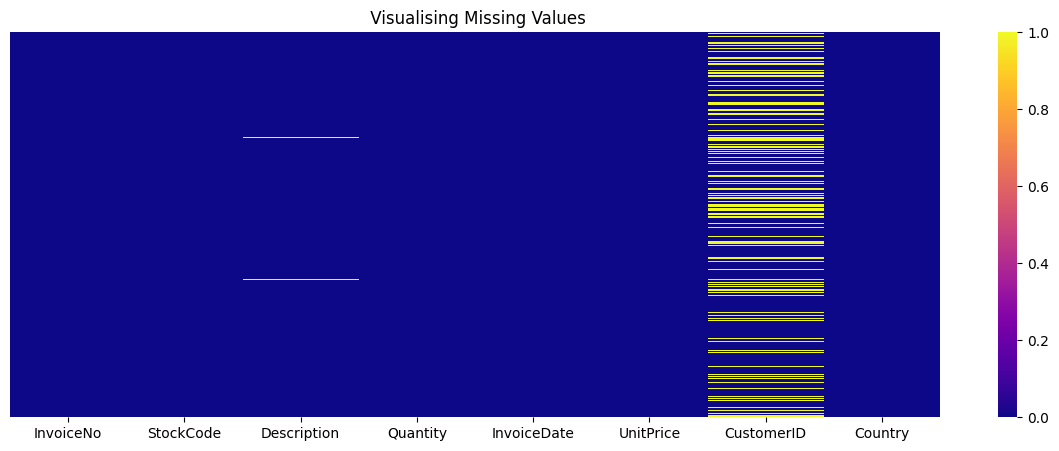

In [6]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(retail_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [7]:
retail_df.dropna(inplace=True)

In [8]:
retail_df.shape

(406829, 8)

In [9]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# dataframe have negative valiues in quantity.
#Here we observed that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop this entries.
retail_df[retail_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [11]:
#changing the datatype to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str') 

In [12]:
#also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')] 

In [13]:
# Checking how many values are present for unitprice==0
print(len(retail_df[retail_df['UnitPrice']==0]))
# taking unitprice values greater than 0
retail_df = retail_df[retail_df['UnitPrice']>0] 
retail_df.head()

40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397884.0,12.988238,179.331775,1.000,2.00,6.00,12.00,80995.00
UnitPrice,397884.0,3.116488,22.097877,0.001,1.25,1.95,3.75,8142.75
CustomerID,397884.0,15294.423453,1713.141560,12346.000,13969.00,15159.00,16795.00,18287.00


> ## Feature Engineering

In [15]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
# retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H:%M")
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%m/%d/%Y %H:%M")

In [16]:
# Vectorized approach (faster)
retail_df["year"] = retail_df["InvoiceDate"].dt.year 
retail_df["month_num"] = retail_df["InvoiceDate"].dt.month 
retail_df["day_num"] = retail_df["InvoiceDate"].dt.day 
retail_df["hour"] = retail_df["InvoiceDate"].dt.hour 
retail_df["minute"] = retail_df["InvoiceDate"].dt.minute
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [17]:
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['UnitPrice']

In [18]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


> ## EDA

In [19]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

### Top 10 Products:

In [20]:
top_10_product = retail_df['Description'].value_counts().reset_index().rename(columns={'Description':'Product_name'}).head(10)
top_10_product

,Product_name,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


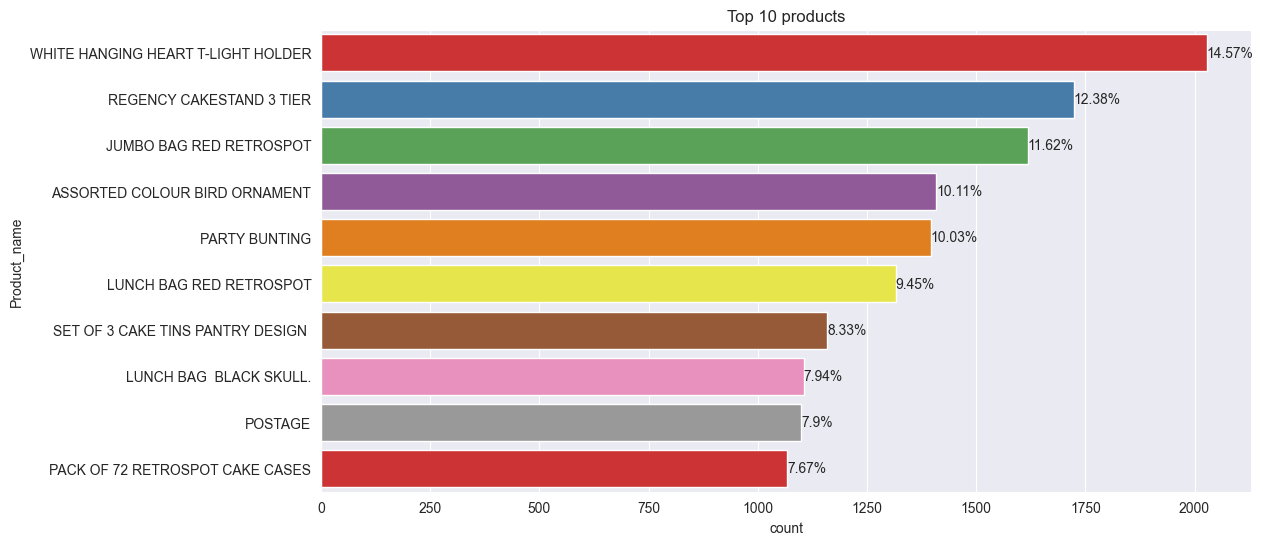

In [21]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
ax = sns.barplot(x=top_10_product['count'], y=top_10_product['Product_name'],palette='Set1')
plt.title('Top 10 products')
for i, v in enumerate(top_10_product['count']):
    percentage = round((v / top_10_product['count'].sum()) * 100, 2)
    ax.text(v + 0.05, i, f'{percentage}%', va='center')
plt.show()

### Top 10 items in terms of StockCode.

In [22]:
top_10_StockCodes = retail_df['StockCode'].value_counts().reset_index().head(10)
top_10_StockCodes

,StockCode,count
0,85123A,2035
1,22423,1723
2,85099B,1618
3,84879,1408
4,47566,1396
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


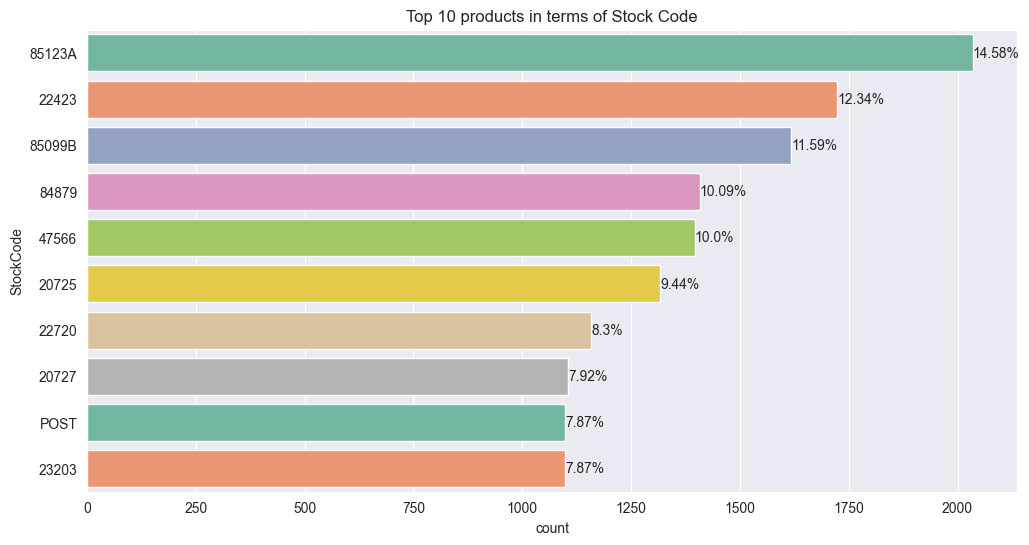

In [23]:
# top 10 product in terms of StcokCode
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_10_StockCodes['count'],y=top_10_StockCodes['StockCode'],palette='Set2')
plt.title('Top 10 products in terms of Stock Code')
for i, v in enumerate(top_10_StockCodes['count']):
    percentage = round((v / top_10_StockCodes['count'].sum()) * 100, 2)
    ax.text(v + 0.05, i, f'{percentage}%', va='center')
plt.show()

### Top 10 customers:

In [24]:
top_10_customers = retail_df['CustomerID'].value_counts().reset_index().rename(columns={'count':'Products_purchasing_Count'}).head(10)
top_10_customers['Net_percentages'] = top_10_customers['Products_purchasing_Count'] / top_10_customers['Products_purchasing_Count'].sum() * 100
top_10_customers

,CustomerID,Products_purchasing_Count,Net_percentages
0,17841.0,7847,22.094889
1,14911.0,5675,15.979164
2,14096.0,5111,14.391102
3,12748.0,4595,12.938195
4,14606.0,2700,7.602422
5,15311.0,2379,6.698578
6,14646.0,2076,5.845417
7,13089.0,1818,5.118964
8,13263.0,1677,4.721948
9,14298.0,1637,4.609320


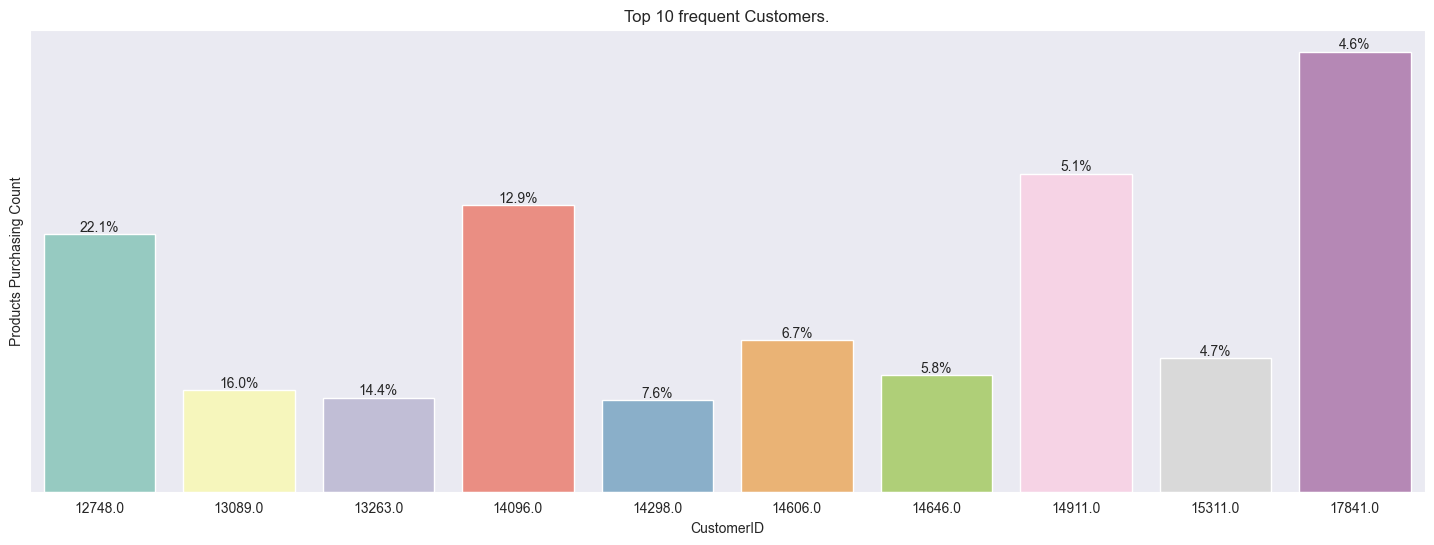

In [25]:
# Top 10 frequent Customers
plt.figure(figsize=(18,6))
ax = sns.barplot(x=top_10_customers['CustomerID'],y = top_10_customers['Products_purchasing_Count'],palette='Set3')
plt.title('Top 10 frequent Customers.')
plt.yticks([])
plt.ylabel('Products Purchasing Count')
# ax.bar_label()
# Add NetSales percentage after the bars
for i, p in enumerate(ax.patches):
    ax.annotate('{:.1f}%'.format(top_10_customers['Net_percentages'].values[i]), 
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')
plt.show()

### Top 5 Countries:

In [26]:
# these aer thetop 10countrieswith high coustomercount:
top_5_countries = retail_df['Country'].value_counts().reset_index().rename(columns={'count':'Customer_count'})
top_5_countries

,Country,Customer_count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


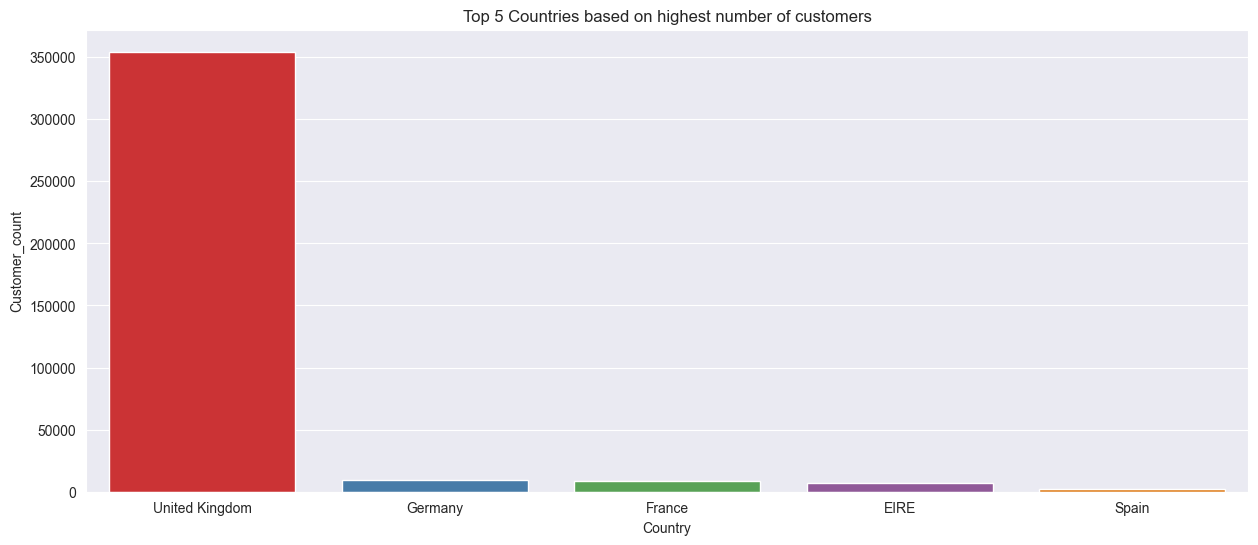

In [27]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5),palette='Set1')
plt.title('Top 5 Countries based on highest number of customers')
plt.show()

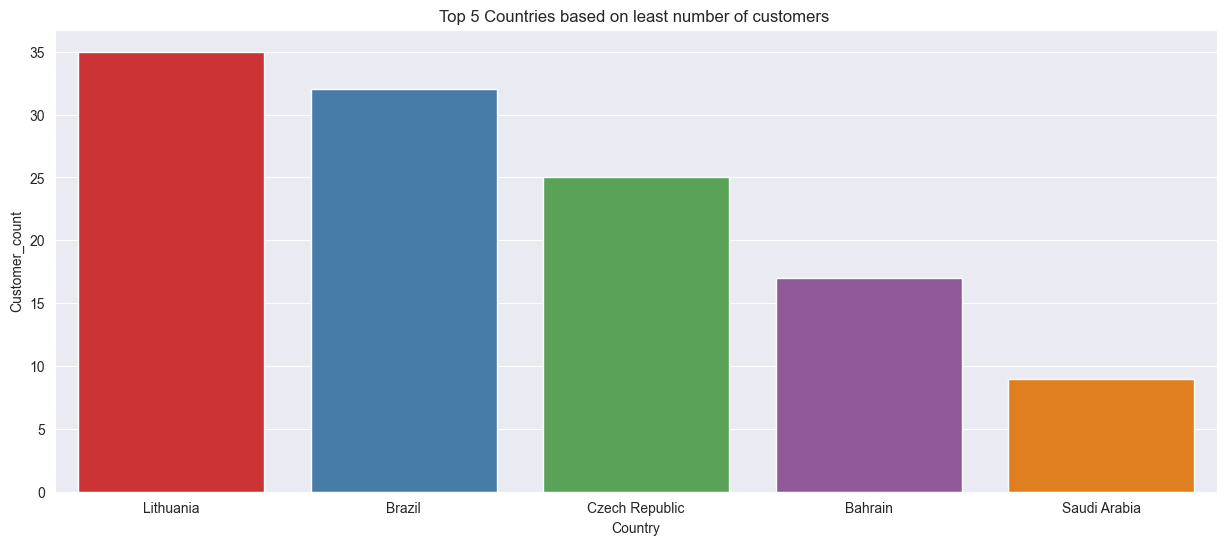

In [28]:
# Find the bottom 5 countries:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['Customer_count'].tail(5),palette='Set1')
plt.title('Top 5 Countries based on least number of customers ')
plt.show()

> ## Sales analysis:

## Sales in each Month:

In [29]:
sales_in_month = retail_df['Month'].value_counts().reset_index().rename(columns={'count':'Sales_count'})
sales_in_month

,Month,Sales_count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


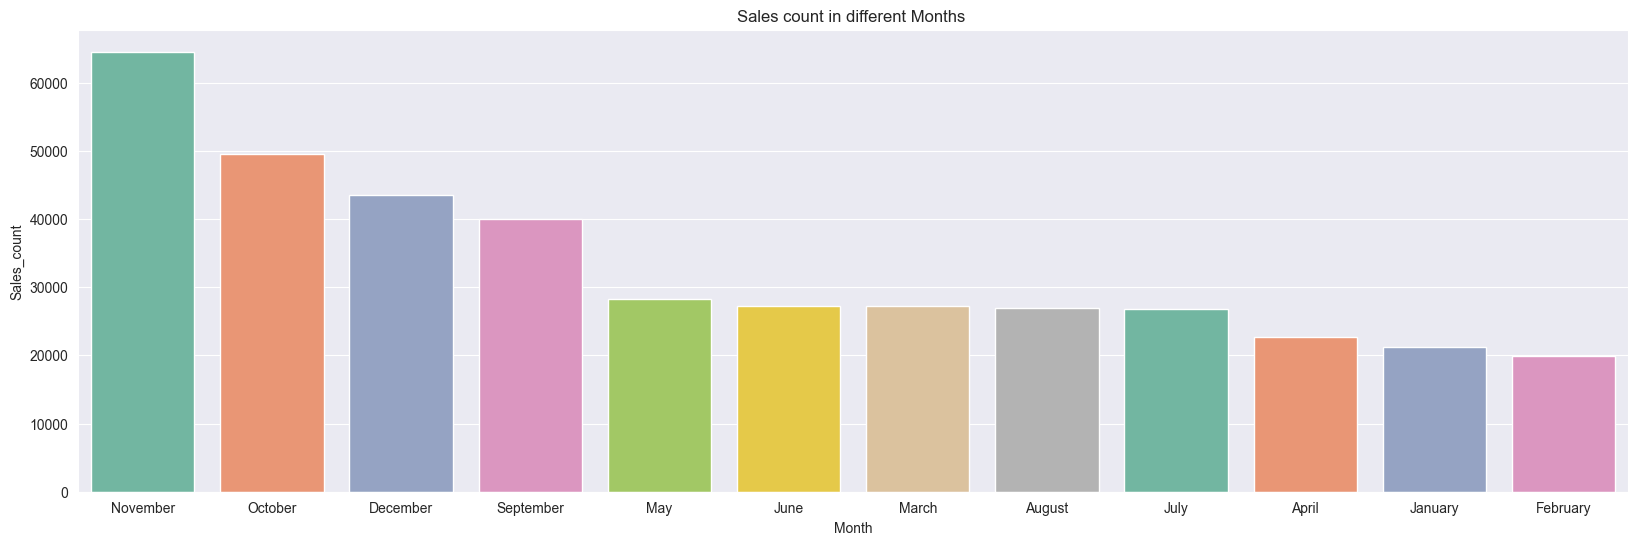

In [30]:
# Sales count in different months.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'], palette='Set2')
plt.title('Sales count in different Months ')
plt.show()

## Sales on Each Day:

In [31]:
sales_on_day_basis=retail_df['Day'].value_counts().reset_index().rename(columns={"count":'Sale_count'})
sales_on_day_basis

,Day,Sale_count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


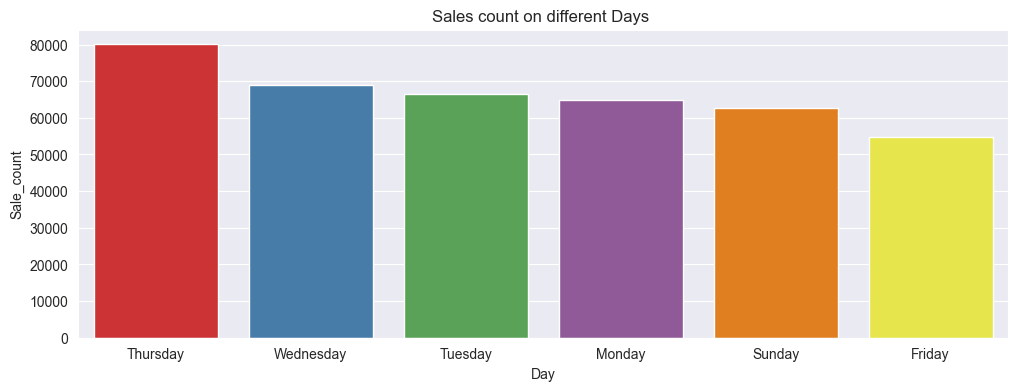

In [32]:
# Sales count on different days.
plt.figure(figsize=(12,4))
sns.barplot(x =sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'], palette= 'Set1')
plt.title('Sales count on different Days ')
plt.show()

> ## Model Building:

## RFM Model Analysis:

In [33]:
rfm_dataframe = retail_df.copy()
rfm_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


In [34]:
retail_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [35]:
import datetime as dt
Latest_Date = dt.datetime(2011,12,10)
# Perform aggregation
rfm_dataframe = retail_df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (Latest_Date - x.max()).days),
    Frequency=('InvoiceNo', 'size'),
    Monetary=('TotalAmount', 'sum')
).reset_index()

# Display the first few rows
rfm_dataframe.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [36]:
# Descriptive Stats= Recency
rfm_dataframe.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

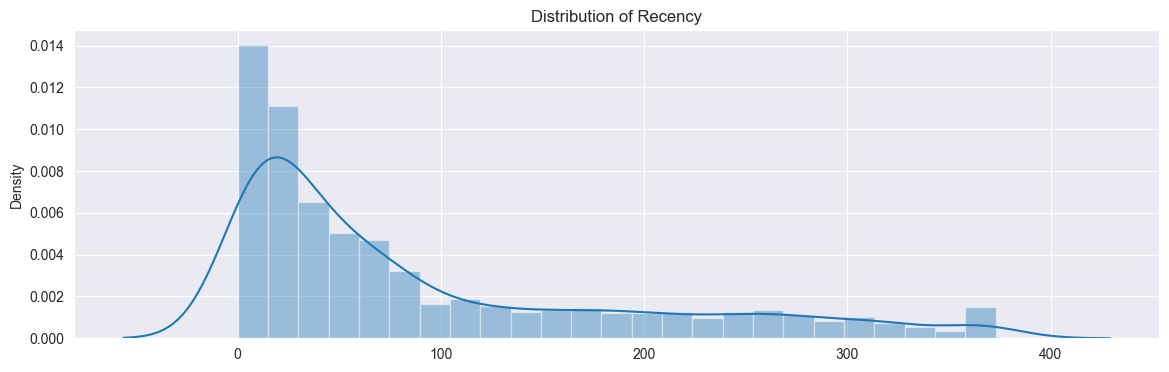

In [37]:
plt.figure(figsize=(14,4))
sns.distplot(x=rfm_dataframe['Recency'])
plt.title('Distribution of Recency')
plt.show()

In [38]:
# Descriptive Stats= Frequency
rfm_dataframe.Frequency.describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

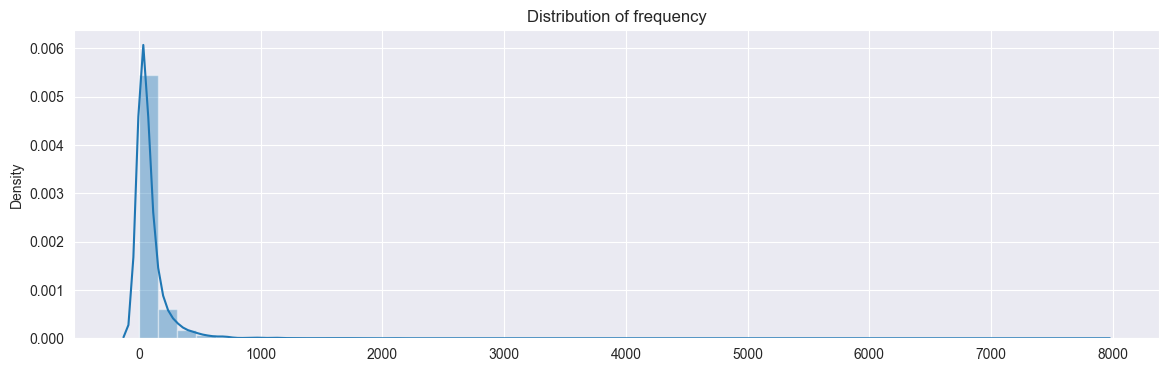

In [39]:
plt.figure(figsize=(14,4))
sns.distplot(x=rfm_dataframe['Frequency'])
plt.title('Distribution of frequency')
plt.show()

In [40]:
# Descriptive Stats= Monetary
rfm_dataframe.Monetary.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

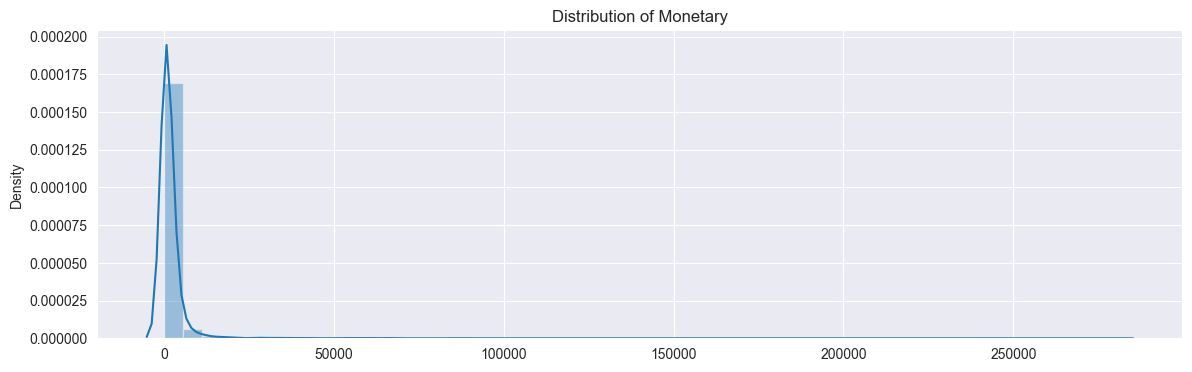

In [41]:
plt.figure(figsize=(14,4))
sns.distplot(x=rfm_dataframe['Monetary'])
plt.title('Distribution of Monetary')
plt.show()

In [42]:
rfm_dataframe.quantile(q = [0.25,0.50,0.75])

,CustomerID,Recency,Frequency,Monetary
0.25,13813.25,17.00,17.0,307.415
0.50,15299.50,50.00,41.0,674.485
0.75,16778.75,141.75,100.0,1661.740


In [43]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])
quantile = quantile.to_dict()
quantile

{'CustomerID': {0.25: 13813.25, 0.5: 15299.5, 0.75: 16778.75},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.485,
  0.75: 1661.7400000000002}}

> Recency Scoring(RScoring):
- `Recency` is a metric that indicates how recently a customer has interacted with the company.
- The lower the recency score, the more recent the customer interaction, which is typically better for the company.

`Quartile System:` The function uses quartiles to categorize recency values:
- 1: The 1st quartile (0.25): The most recent customers.
- 2: The 2nd quartile (0.50): Customers that interacted recently but not as much as the top quartile.
- 3: The 3rd quartile (0.75): Customers that have not interacted for a while.
- 4: The 4th quartile: Customers who are the least recent, indicating they have not interacted for a long time.
**In RScoring, lower recency values are better (because a recent interaction is more valuable).**

> Frequency and Monetary Scoring (FnMScoring):

- **Frequency**: The number of times a customer has made a purchase. A higher frequency indicates a more engaged customer.
- **Monetary**: The total amount of money a customer has spent. Higher spending typically indicates a more valuable customer.

_Quartile System:_

- The 1st quartile (0.25): The lowest spenders or infrequent buyers.
- The 2nd quartile (0.50): Moderately frequent or moderate spenders.
- The 3rd quartile (0.75): Customers who have either high frequency or spending.
- The 4th quartile: The highest frequency or monetary values, indicating the most valuable customers.


**1: The most valuable customers, who either buy frequently or spend the most.
2: Customers who have moderate engagement.
3: Customers with lower frequency or spending.
4: Least valuable customers.**

In [44]:
def RScoring(x, metric, quartiles_dict):
    # Recency scoring: lower recency is better (recent interactions)
    if x <= quartiles_dict[metric][0.25]:
        return 1  # Most recent
    elif x <= quartiles_dict[metric][0.50]:
        return 2
    elif x <= quartiles_dict[metric][0.75]:
        return 3
    else:
        return 4  # Least recent

def FnMScoring(x, metric, quartiles_dict):
    # Frequency/Monetary scoring: higher values are better
    if x <= quartiles_dict[metric][0.25]:
        return 4  # Low frequency/monetary
    elif x <= quartiles_dict[metric][0.50]:
        return 3
    elif x <= quartiles_dict[metric][0.75]:
        return 2
    else:
        return 1  # High frequency/monetary


In [45]:
# Vectorized approach using np.select for scoring
def calculate_rfm_scores(rfm_dataframe, quantile):
    # Recency scoring
    rfm_dataframe['R'] = np.select(
        [rfm_dataframe['Recency'] <= quantile['Recency'][0.25], 
         rfm_dataframe['Recency'] <= quantile['Recency'][0.50], 
         rfm_dataframe['Recency'] <= quantile['Recency'][0.75]],
        [1, 2, 3], default=4
    )

    # Frequency scoring
    rfm_dataframe['F'] = np.select(
        [rfm_dataframe['Frequency'] <= quantile['Frequency'][0.25], 
         rfm_dataframe['Frequency'] <= quantile['Frequency'][0.50], 
         rfm_dataframe['Frequency'] <= quantile['Frequency'][0.75]],
        [4, 3, 2], default=1
    )

    # Monetary scoring
    rfm_dataframe['M'] = np.select(
        [rfm_dataframe['Monetary'] <= quantile['Monetary'][0.25], 
         rfm_dataframe['Monetary'] <= quantile['Monetary'][0.50], 
         rfm_dataframe['Monetary'] <= quantile['Monetary'][0.75]],
        [4, 3, 2], default=1
    )
    
    return rfm_dataframe

# Now apply the function
rfm_dataframe = calculate_rfm_scores(rfm_dataframe, quantile)

# Show the updated dataframe
rfm_dataframe.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,4,4,1
1,12347.0,2,182,4310.00,1,1,1
2,12348.0,75,31,1797.24,3,3,1
3,12349.0,18,73,1757.55,2,2,1
4,12350.0,310,17,334.40,4,4,3


In [46]:
# Combine RFM scores into a single string (RFM_Group)
rfm_dataframe['RFM_Group'] = rfm_dataframe[['R', 'F', 'M']].astype(str).agg(''.join, axis=1)

# Calculate the total RFM score by summing R, F, and M columns
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis=1)

# Display the updated dataframe
rfm_dataframe.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12347.0,2,182,4310.00,1,1,1,111,3
2,12348.0,75,31,1797.24,3,3,1,331,7
3,12349.0,18,73,1757.55,2,2,1,221,5
4,12350.0,310,17,334.40,4,4,3,443,11


In [47]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   float64
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
 4   R           4338 non-null   int32  
 5   F           4338 non-null   int32  
 6   M           4338 non-null   int32  
 7   RFM_Group   4338 non-null   object 
 8   RFM_Score   4338 non-null   int64  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 254.3+ KB


In [48]:
# Define the loyalty levels
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']

# Use qcut to segment the RFM_Score into quartiles and assign the corresponding Loyalty Level
rfm_dataframe['RFM_Loyalty_Level'] = pd.qcut(rfm_dataframe['RFM_Score'], q=4, labels=Loyalty_Level)

# Show the updated dataframe
rfm_dataframe.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronze


### selecting customers who have the best RFM scores (Recency = 1, Frequency = 1, and Monetary = 1). 
### These are the customers with the highest loyalty.

In [49]:
# Filter the dataframe where RFM_Group is '111', sort by Monetary in descending order, reset the index, and get top 10 records
top_10_spenders = rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetary", ascending=False).reset_index(drop=True).head(10)

# Show the top 10 records
top_10_spenders

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinum
4,14156.0,9,1400,117379.63,1,1,1,111,3,Platinum
5,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
6,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
7,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
8,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
9,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum


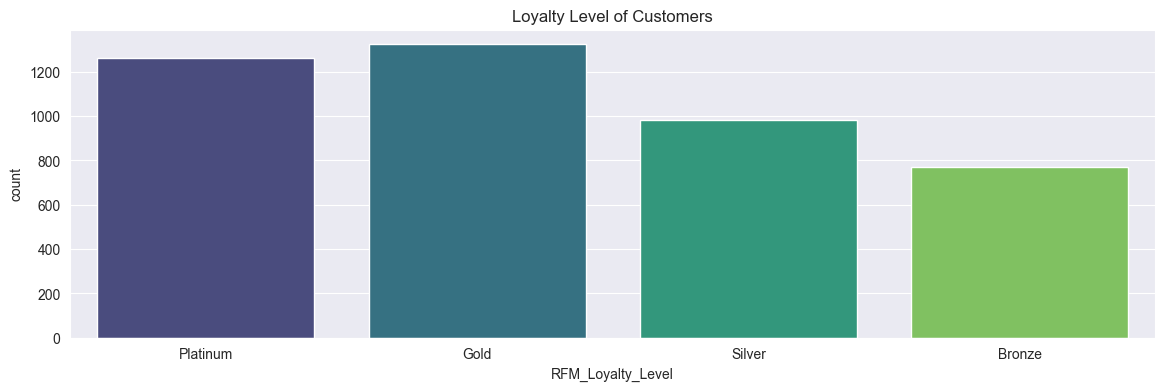

In [50]:
plt.figure(figsize=(14, 4))
sns.countplot(data=rfm_dataframe, x='RFM_Loyalty_Level',palette='viridis')
plt.title('Loyalty Level of Customers')
plt.show()

In [51]:
#Folowing table contains our target peoples
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinum'].sort_values("Monetary",ascending = False).reset_index().head(10)

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,1689,14646.0,1,2076,280206.02,1,1,1,111,3,Platinum
1,4201,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,3728,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
3,1879,14911.0,1,5675,143825.06,1,1,1,111,3,Platinum
4,55,12415.0,24,714,124914.53,2,1,1,211,4,Platinum
5,1333,14156.0,9,1400,117379.63,1,1,1,111,3,Platinum
6,3771,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
7,2702,16029.0,38,242,81024.84,2,1,1,211,4,Platinum
8,3176,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
9,1289,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum


## Model Building and preprocessing

In [52]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
columns_to_standardize = ['Recency', 'Frequency', 'Monetary']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization and create a DataFrame with the standardized columns
standardized_values = scaler.fit_transform(rfm_dataframe[columns_to_standardize])

# Create a DataFrame with the standardized values and assign them directly to the original DataFrame
rfm_dataframe[columns_to_standardize] = standardized_values

rfm_dataframe.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12346.0,2.329388,-0.396578,8.358668,4,4,1,441,9,Silver
1,12347.0,-0.900588,0.394649,0.250966,1,1,1,111,3,Platinum
2,12348.0,-0.170593,-0.265435,-0.028596,3,3,1,331,7,Gold
3,12349.0,-0.740589,-0.081836,-0.033012,2,2,1,221,5,Platinum
4,12350.0,2.179389,-0.326635,-0.191347,4,4,3,443,11,Bronze


In [53]:
rfm_dataframe.rename(columns=dict(zip(columns_to_standardize, [f'{col}_Standardized' for col in columns_to_standardize])), inplace=True)
rfm_dataframe.head()

,CustomerID,Recency_Standardized,Frequency_Standardized,Monetary_Standardized,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12346.0,2.329388,-0.396578,8.358668,4,4,1,441,9,Silver
1,12347.0,-0.900588,0.394649,0.250966,1,1,1,111,3,Platinum
2,12348.0,-0.170593,-0.265435,-0.028596,3,3,1,331,7,Gold
3,12349.0,-0.740589,-0.081836,-0.033012,2,2,1,221,5,Platinum
4,12350.0,2.179389,-0.326635,-0.191347,4,4,3,443,11,Bronze


### Kmeans clustring:

> ## Elbow or wcss vs Silhouette score:
1. `Elbow Method (Inertia-based Approach):`
* What it measures: The inertia (also called **within-cluster sum of squares or wcss**) measures how tightly the data points are grouped within each cluster. Lower inertia values indicate that the data points are closer to their centroids, meaning the clustering is "tighter".

* How it works: The Elbow Method identifies the "elbow" point on a plot of inertia values as k increases. The elbow point represents a sharp decrease in inertia followed by a relatively flat curve, indicating that increasing k beyond this point doesn't improve the clustering much.

* Interpretation: A smaller inertia is often associated with having more clusters because each cluster can better capture the data. However, the elbow point doesn't necessarily mean that the clustering is the most optimal from a "grouping" perspective—just that adding more clusters after a certain point doesn’t improve the intra-cluster distances much.

2. `Silhouette Score:`
* What it measures: The Silhouette Score measures both how close the data points are to their own cluster (cohesion) and how well-separated the clusters are from each other (separation). It gives a sense of how well-defined the clusters are.
* How it works: The Silhouette Score is computed as the average of all silhouette coefficients, which range from -1 to 1. A higher Silhouette Score indicates that clusters are better separated and more cohesive.
* Interpretation: The Silhouette Score tends to be more sensitive to the quality of the clusters in terms of both tightness and separation, making it a better measure for determining the ideal number of clusters when the goal is to have well-separated and cohesive clusters.

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

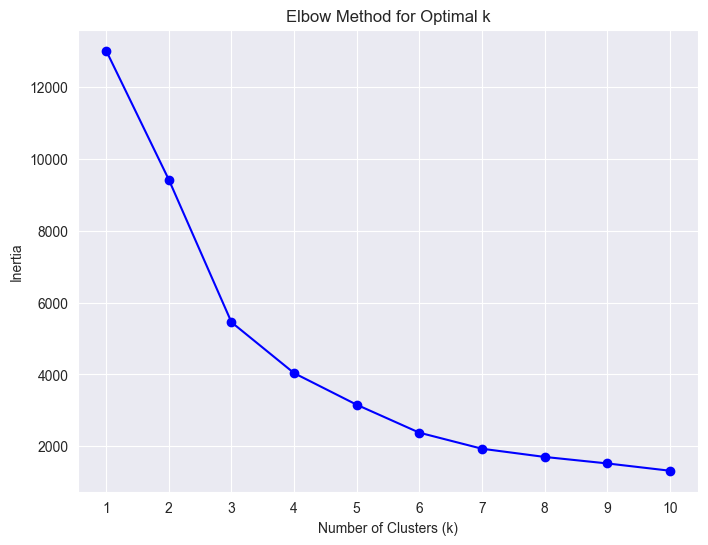

In [55]:
# Define the range of cluster numbers to test
k_range = range(1, 11)  # testing k values from 1 to 10

# Initialize an empty list to store the inertia values for each k
inertia_values = []

# Fit KMeans for each k and calculate inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_dataframe[['Recency_Standardized', 'Frequency_Standardized', 'Monetary_Standardized']])
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [56]:
# plt.show(

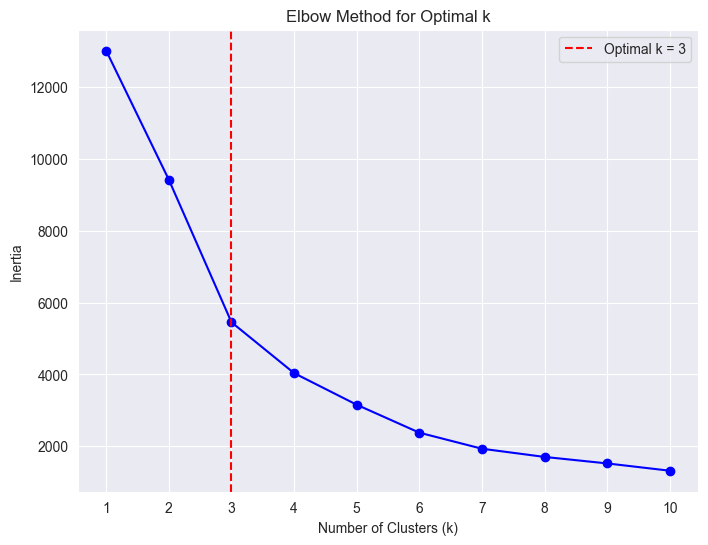

In [57]:
# Convert inertia values into a numpy array
inertia_values = np.array(inertia_values)

# Compute the first and second derivatives of inertia
first_derivative = np.diff(inertia_values) # It tells us how fast the inertia is changing as k increases.
second_derivative = np.diff(first_derivative) #  helps us identify where the change in inertia slows down significantly (the elbow)

# Identify the "elbow" point where the second derivative changes most
optimal_k = np.argmax(second_derivative >= 0) + 2  # Adding 2 because np.diff reduces length by 1

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

# Highlight the optimal k value dynamically
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [58]:
#Silhouette Score for validating the above n_clsters:
X = rfm_dataframe[['Recency_Standardized', 'Frequency_Standardized', 'Monetary_Standardized']].values

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5764834431664606
For n_clusters = 3, silhouette score is 0.6018678448358709
For n_clusters = 4, silhouette score is 0.5998409033581842
For n_clusters = 5, silhouette score is 0.6174153570070913
For n_clusters = 6, silhouette score is 0.5921950196200336
For n_clusters = 7, silhouette score is 0.552029586867474
For n_clusters = 8, silhouette score is 0.5108911110469092
For n_clusters = 9, silhouette score is 0.5098907015467566
For n_clusters = 10, silhouette score is 0.4810658888774271
For n_clusters = 11, silhouette score is 0.4341974241799532
For n_clusters = 12, silhouette score is 0.4343634351272035


> ### **In summary:**

* The Elbow Method might suggest that k=3 is optimal based on inertia (tightness), but the Silhouette Score suggests that k=2 is optimal because it provides a better balance of cohesion and separation.

* When Silhouette Score is high for k=3 andv5, it indicates that the two clusters are more meaningful and well-separated than the clusters produced by k=3 (or any higher value).

> ### What to choose:  

* Silhouette Score is generally more reliable when you're concerned about the quality of clustering in terms of how well-separated and cohesive the clusters are.
* The Elbow Method is useful for identifying the point of diminishing returns in terms of how much the inertia is improving as you increase k, but it doesn't always capture the true quality of the clusters.

## Final model(Kmeans with 2 number of clusters)

In [59]:
# Applying KMeans clustering with n_clusters=2
# Prepare X with Recency, Frequency, and Monetary standardized features
#X = rfm_dataframe[['Recency_Standardized', 'Frequency_Standardized', 'Monetary_Standardized']].values

kmeans_3 = KMeans(n_clusters=3, random_state=42)  # added random_state for reproducibility
rfm_dataframe['Cluster_3'] = kmeans_3.fit_predict(X)

# Show first 5 rows
rfm_dataframe.head()

,CustomerID,Recency_Standardized,Frequency_Standardized,Monetary_Standardized,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Cluster_3
0,12346.0,2.329388,-0.396578,8.358668,4,4,1,441,9,Silver,1
1,12347.0,-0.900588,0.394649,0.250966,1,1,1,111,3,Platinum,0
2,12348.0,-0.170593,-0.265435,-0.028596,3,3,1,331,7,Gold,0
3,12349.0,-0.740589,-0.081836,-0.033012,2,2,1,221,5,Platinum,0
4,12350.0,2.179389,-0.326635,-0.191347,4,4,3,443,11,Bronze,1


In [60]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)  # added random_state for reproducibility
rfm_dataframe['Cluster_5'] = kmeans_5.fit_predict(X)

# Show first 5 rows
rfm_dataframe.head()

,CustomerID,Recency_Standardized,Frequency_Standardized,Monetary_Standardized,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Cluster_3,Cluster_5
0,12346.0,2.329388,-0.396578,8.358668,4,4,1,441,9,Silver,1,4
1,12347.0,-0.900588,0.394649,0.250966,1,1,1,111,3,Platinum,0,0
2,12348.0,-0.170593,-0.265435,-0.028596,3,3,1,331,7,Gold,0,0
3,12349.0,-0.740589,-0.081836,-0.033012,2,2,1,221,5,Platinum,0,0
4,12350.0,2.179389,-0.326635,-0.191347,4,4,3,443,11,Bronze,1,1


In [61]:
rfm_dataframe['Cluster_3'].unique()

array([1, 0, 2])

In [62]:
rfm_dataframe['Cluster_5'].unique()

array([4, 0, 1, 2, 3])

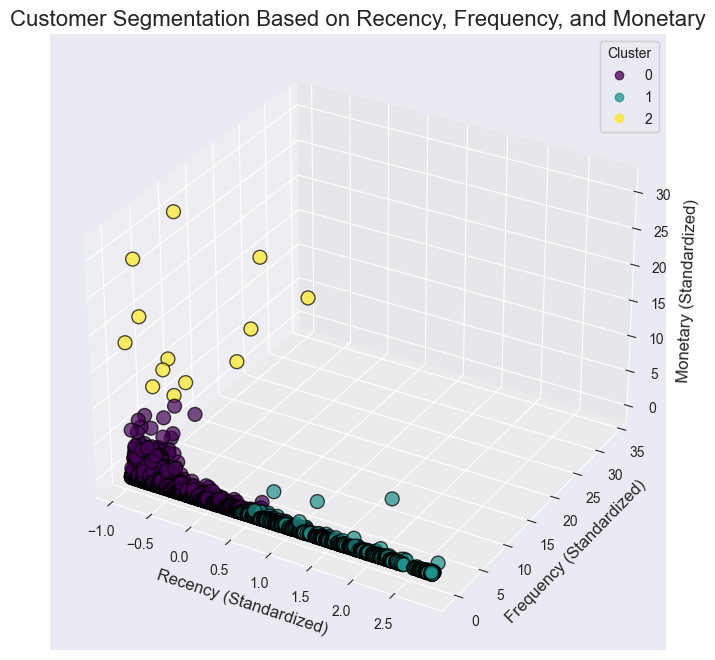

In [67]:
# Plot the clusters in a 3D scatter plot for 3 number of clusters
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(rfm_dataframe['Recency_Standardized'], 
                     rfm_dataframe['Frequency_Standardized'], 
                     rfm_dataframe['Monetary_Standardized'], 
                     c=rfm_dataframe['Cluster_3'], cmap='viridis', s=100, alpha=0.7, edgecolor='k')

# Add labels and title
ax.set_xlabel('Recency (Standardized)', fontsize=12)
ax.set_ylabel('Frequency (Standardized)', fontsize=12)
ax.set_zlabel('Monetary (Standardized)', fontsize=12)
ax.set_title('Customer Segmentation Based on Recency, Frequency, and Monetary', fontsize=16)

# Add color legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show the plot
plt.show()

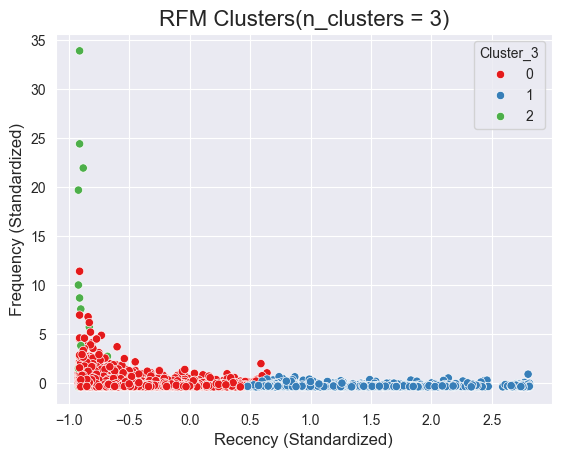

In [64]:
# Visualize the clusters 2 D plot:
sns.scatterplot(data=rfm_dataframe, x='Recency_Standardized', y='Frequency_Standardized', hue='Cluster_3', palette='Set1')
plt.xlabel('Recency (Standardized)', fontsize=12)
plt.ylabel('Frequency (Standardized)', fontsize=12)
plt.title('RFM Clusters(n_clusters = 3)',fontsize=16)
plt.show()

## The RFM clustering results show that there are three distinct clusters of customers:

- Cluster 0: These customers are less recent than Cluster 1, but they are still relatively frequent buyers. They have a lower monetary value than Cluster 0, but they are still valuable customers. They should be targeted with marketing campaigns that encourage them to increase their spending.
- Cluster 1: These customers are the most recent and frequent buyers, and they also have the highest monetary value. They are the most valuable customers to the business, and they should be targeted with marketing campaigns that encourage them to continue spending
- Cluster 2: These customers are the least recent and frequent buyers, and they also have the lowest monetary value. They are the least valuable customers to the business, and they may be at risk of churning. They should be targeted with marketing campaigns that encourage them to become more active.

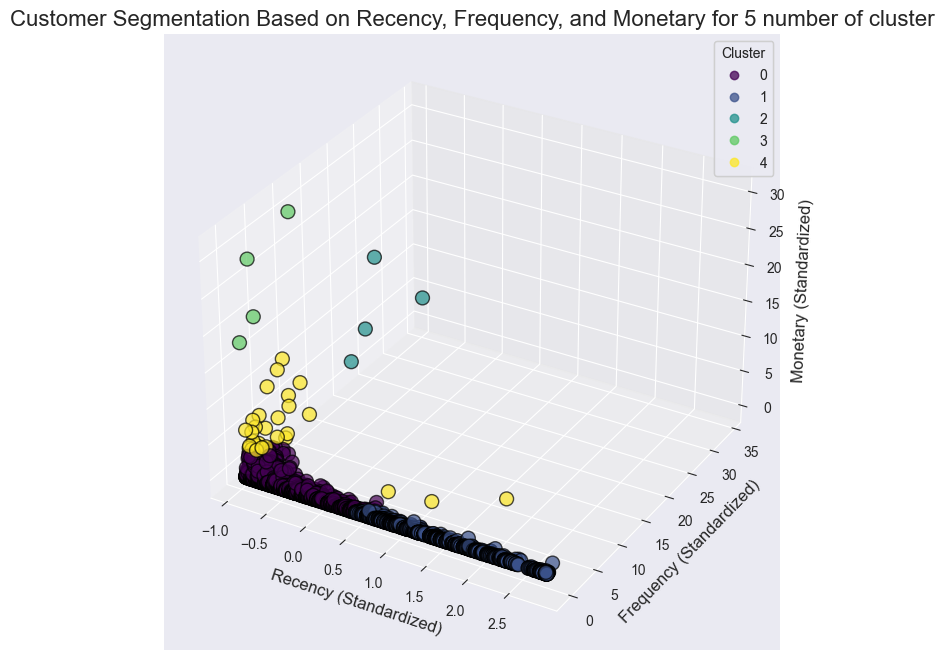

In [68]:
# Plot the clusters in a 3D scatter plot for 5 number of clusters
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(rfm_dataframe['Recency_Standardized'], 
                     rfm_dataframe['Frequency_Standardized'], 
                     rfm_dataframe['Monetary_Standardized'], 
                     c=rfm_dataframe['Cluster_5'], cmap='viridis', s=100, alpha=0.7, edgecolor='k')

# Add labels and title
ax.set_xlabel('Recency (Standardized)', fontsize=12)
ax.set_ylabel('Frequency (Standardized)', fontsize=12)
ax.set_zlabel('Monetary (Standardized)', fontsize=12)
ax.set_title('Customer Segmentation Based on Recency, Frequency, and Monetary for 5 number of cluster', fontsize=16)

# Add color legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show the plot
plt.show()

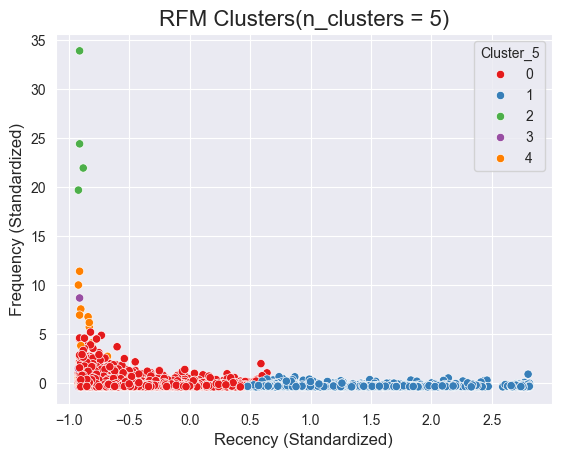

In [66]:
import seaborn as sns

# Visualize the clusters 2 D plot:
sns.scatterplot(data=rfm_dataframe, x='Recency_Standardized', y='Frequency_Standardized', hue='Cluster_5', palette='Set1')
plt.xlabel('Recency (Standardized)', fontsize=12)
plt.ylabel('Frequency (Standardized)', fontsize=12)
plt.title('RFM Clusters(n_clusters = 5)',fontsize=16)
plt.show()